In [ ]:
#Please add any and all import statements here
import seaborn as sns
import pandas as pd
from collections import Counter
import numpy as np
from google.colab import files
from google.colab import drive
import matplotlib.pyplot as plt
import plotly.express  as px
from matplotlib.gridspec import GridSpec
from sklearn import preprocessing
import scipy
#drive.mount('/content/drive')

**This notebooks is for the statistics for data science project**

Few rules:


1.   Please add markdown text to indicate functionality of a cell
2.   Feel free to experiment with different techniques but if the cell is to be left out from final project. Please delete it.



**LOADING DATASET**

In [ ]:
courses_dataframe = pd.read_csv("/content/drive/My Drive/SDS-project/udemy_courses.csv")

**EXPLORATORY DATA ANALYSIS**

Data Cleaning

1.   We test to see if the dataframe was successfully loaded by checking its shape to ensure all the rows and columns were loaded
2.   We then check if the values of the rows and columns were loaded successfully without any change in type of data



In [ ]:
courses_dataframe.shape

(3678, 12)

In [ ]:
courses_dataframe.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


TESTING FOR NULL VALUES

In [ ]:
courses_dataframe.isnull().values.any()

True

Since NULL values exist, we extract the columns which contain NULL values in order to treat them 

In [ ]:
empty_values_df = courses_dataframe.isna().any()
columns_with_nan = courses_dataframe.columns[empty_values_df].tolist()
columns_with_nan

['price', 'level']

We impute the mean of the price column into the cells of the price column which are NULL

In [ ]:
courses_dataframe['price'].fillna(courses_dataframe['price'].mean(), inplace=True)

We impute the mode of the categorical columns in places where data is missing. Here, primarily for the level column

In [ ]:
courses_dataframe.fillna(courses_dataframe.select_dtypes(include='object').mode().iloc[0], inplace=True)

We run a final check and see that there are no NULL values and proceed with the rest of the analysis

In [ ]:
courses_dataframe.isnull().values.any()

False

Finding and deleting duplicate rows

Here we test to see if there are any duplicates in the dataset. A simple test yields true showing the presence of duplicated course_title and so we drop those rows whose values are duplicates of previous rows

In [ ]:
courses_dataframe['course_title'].duplicated().any()

True

In [ ]:
courses_dataframe = courses_dataframe.drop_duplicates(subset ="course_title")

The same tests repeated now shows that there are no longer duplicated rows based on the course_title in the dataset.

In [ ]:
courses_dataframe['course_title'].duplicated().any()

False

Dropping irrelevant columns 

1.   course_id : This column is irrelevant to us due to the fact that it is assigned by udemy due to which there isn't any continuity and are randomly assigned. So the column doesn't add any value
2.   url : It is a string value denoting the url link of the specific course. This column is also irrelevant as the aim of the project isn't to diaplay the course nor does it form any statistics.
3. published_timestamp: It is a string that holds the date and time of when the course was published which also doesn't add any value to our analysis.



In [ ]:
courses_dataframe.drop(['course_id','url','published_timestamp'],axis=1,inplace=True)

Checking for typos and inconsistent capitalisation

We test the categorical columns to see if there are any values in the column where in there might be issues with capitalisation or there is a typo

In [ ]:
courses_dataframe['is_paid'].value_counts()

True     3354
False     309
Name: is_paid, dtype: int64

In [ ]:
courses_dataframe['level'].value_counts()

All Levels            1943
Beginner Level        1244
Intermediate Level     418
Expert Level            58
Name: level, dtype: int64

In [ ]:
courses_dataframe['subject'].value_counts()

Web Development        1196
Business Finance       1191
Musical Instruments     676
Graphic Design          600
Name: subject, dtype: int64

Result:No typos or inconsistent capitalisations were found hence no correction required.

Now we save the preprocessed csv for future work.

In [ ]:
courses_dataframe.to_csv('preprocessed.csv')
!cp preprocessed.csv "drive/My Drive/SDS-project/"


**DATA VISUALIZATION**

Content Duration

It is the total time that a subscriber would take to finish a course. It is specified in hours to ensure a certain amount of uniformity as the number of lectures column does not generalise the time.

We build a boxplot to visualise the data.

In [ ]:
boxplot = px.box(courses_dataframe,
       x='content_duration',
       y='subject',
       orientation='h',
       color='level',
       title='Duration Distribution Across Type of Course',
      )
boxplot.update_xaxes(title='Content Duration')
boxplot.update_yaxes(title='Subject')
boxplot.show()

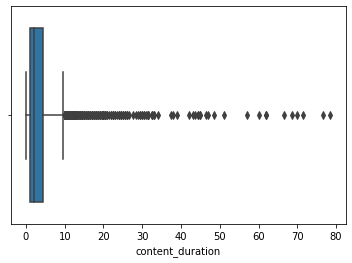

In [ ]:
sns.boxplot(x=courses_dataframe['content_duration'])

On building the box plot for content duration we realise there are a lot of outliers in the column. Hence we run the below method to remove the outliers based on the zscore value being less than 3.

In [ ]:
def outlier_removal(df):
  z = np.abs(stats.zscore(df['content_duration']))
  list_outliers =list(np.where(z > 3))
  list_outliers = list(list_outliers[0])
  df = df.drop(list_outliers)
  if "index" in df.columns:
    df.drop(['index'],axis=1,inplace=True)
  df.reset_index(inplace=True)
  return df

In [ ]:
new=outlier_removal(courses_dataframe)
new=outlier_removal(new)
new=outlier_removal(new)
new=outlier_removal(new)
new=outlier_removal(new)
new=outlier_removal(new)
courses_dataframe=outlier_removal(new)

In [ ]:
courses_dataframe.drop(['index'],axis=1,inplace=True)

Post outlier removal with a threshold of three standard deviations (i.e 97% of the data), we notice the boxplot has a much more symmetric appearance. 

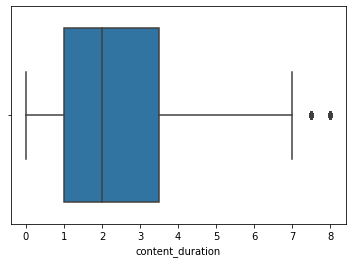

In [ ]:
sns.boxplot(x=courses_dataframe['content_duration'])

Prices of Courses

The price of a course here is specified in dollars. In some cases, it might also be 0 since the course is free. 

We build both a histogram and a boxplot to visualise the same data

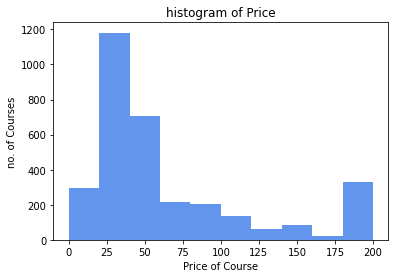

In [ ]:
fig,ax = plt.subplots(1,1)
ax.hist(courses_dataframe['price'],color="cornflowerblue")
ax.set_title("histogram of Price")
ax.set_xlabel('Price of Course')
ax.set_ylabel('no. of Courses')
plt.show()

In [ ]:
boxplot = px.box(courses_dataframe,
       x='price',
       y='subject',
       orientation='h',
       color='level',
       title='Price Distribution Across Type of Course',
      )

boxplot.update_xaxes(title='Price')
boxplot.update_yaxes(title='Subject')
boxplot.show()

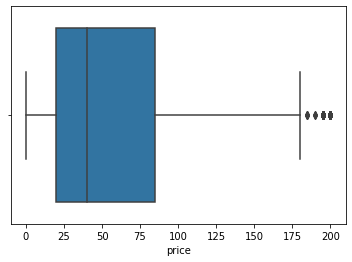

In [ ]:
sns.boxplot(x=courses_dataframe['price'])

PAID OR FREE

The is_paid column is an indication fo wether the course is free or not. It is a categorical variable.

Since the data is categorical we chose to use a pie chart to visualize it. 

In [ ]:
print(Counter(courses_dataframe['is_paid']))

Counter({True: 2939, False: 294})


In [ ]:
title_type = courses_dataframe.groupby('is_paid').agg('count')
type_labels = title_type.course_title.sort_values().index 
type_counts = title_type.course_title.sort_values()

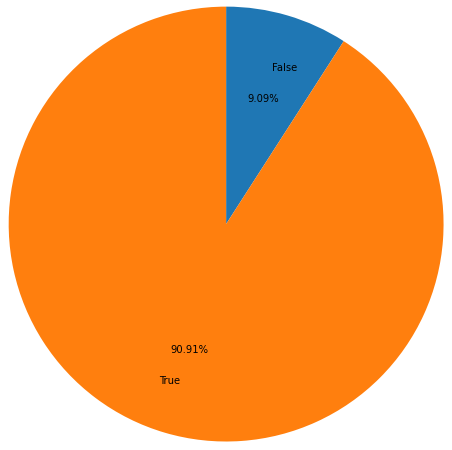

In [ ]:
plt.pie(type_counts,labels=type_labels,startangle=90.0,counterclock=False,radius=2.5,labeldistance=0.75, autopct='%.2f%%')
plt.show()

We can see that about 90.9% of the courses under the 4 subjects we deal with in this dataset are paid. 
This could potentially be due to the fact that courses are thought by professionals or professors of popular universities

Level of course

This column denotes the level of difficulty of a course i.e all levels, beginner, intermediate or expert.

Since it is a categorical variable, we visualize it using a bar chart

In [ ]:
i_level=0
b_level=0
e_level=0
a_level=0

for ind in courses_dataframe.index: 
  if courses_dataframe['level'][ind]=="All Levels":
    a_level=a_level+1
  if courses_dataframe['level'][ind]=="Intermediate Level":
    i_level=i_level+1
  if courses_dataframe['level'][ind]=="Beginner Level":
    b_level=b_level+1
  if courses_dataframe['level'][ind]=="Expert Level":
    e_level=e_level+1 

data = {'All Levels':a_level, 'Intermediate Level':i_level, 'Beginner Level':b_level,  
         'Expert Level':e_level} 

{'All Levels': 1654,
 'Beginner Level': 1155,
 'Expert Level': 55,
 'Intermediate Level': 369}

In [ ]:
courses = list(data.keys()) 
values = list(data.values()) 

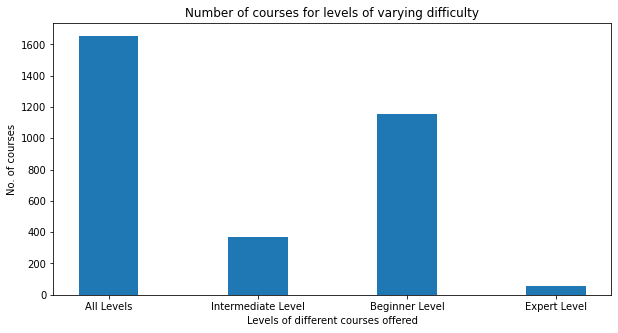

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(courses, values,width = 0.4) 
  
plt.xlabel("Levels of different courses offered") 
plt.ylabel("No. of courses") 
plt.title("Number of courses for levels of varying difficulty") 
plt.show()

**NORMALIZATION AND STANDARDIZATION**

Computing mean, median, standard deviation and so on for all the numeric columns

In [ ]:
courses_dataframe.describe()

,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000
mean,60.919949,2678.231364,89.232601,29.317352,2.571198
std,57.745926,7363.030416,390.035959,24.072230,1.825254
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,90.000000,4.000000,14.000000,1.000000
50%,40.000000,796.000000,15.000000,23.000000,2.000000
75%,85.000000,2266.000000,51.000000,37.000000,3.500000
max,200.000000,161029.000000,11580.000000,321.000000,8.000000


We extract all the numeric columns and first normalize them using a min max scaler in order to bring it to a normal distribution

In [ ]:
num_cols = courses_dataframe.columns[courses_dataframe.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

In [ ]:
new_df= courses_dataframe[num_cols]
x = new_df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)

Standardizing all numeric columns such that their mean=0 and variance=1

We obtain the standardized dataset using standard scaler

In [ ]:
df_normalized.describe()

,0,1,2,3,4
count,3233.00000,3233.000000,3233.000000,3233.000000,3233.000000
mean,0.30460,0.016632,0.007706,0.091331,0.321400
std,0.28873,0.045725,0.033682,0.074991,0.228157
min,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.10000,0.000559,0.000345,0.043614,0.125000
50%,0.20000,0.004943,0.001295,0.071651,0.250000
75%,0.42500,0.014072,0.004404,0.115265,0.437500
max,1.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df_normalized)
scaled_df = pd.DataFrame(scaled_df,columns=num_cols)

In [ ]:
scaled_df.describe()

,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.233000e+03,3.233000e+03,3.233000e+03,3.233000e+03,3.233000e+03
mean,-1.125934e-15,1.294201e-16,-7.080119e-17,-5.642117e-17,-3.009930e-17
std,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00
min,-1.055129e+00,-3.637966e-01,-2.288158e-01,-1.218079e+00,-1.408898e+00
25%,-7.087302e-01,-3.515715e-01,-2.185588e-01,-6.364064e-01,-8.609440e-01
50%,-3.623318e-01,-2.556722e-01,-1.903519e-01,-2.624738e-01,-3.129902e-01
75%,4.170645e-01,-5.599530e-02,-9.803844e-02,3.191992e-01,5.089406e-01
max,2.408855e+00,2.150952e+01,2.946535e+01,1.211885e+01,2.974733e+00


As we can see in the above output, the standard deviation all columns is equal to 1, so their variance is also 1. 
The means of columns aren't exactly 0 but they are to the power -15,-16,-17 which means they are very tiny, almost ignorable decimal values.

Importance of normalization

The goal of normalization is to help change the values of the dataset to the same scale without changing the range between values of the dataset. It is useful in cases where we have multiple columns with different but interdependent data. 

In our case: price and number of subscriber. 
price has a range of 0 to 200 whereas number of subscribers has a range of 0 to 161029. Normalizing helps us compare these columns. 

The graphs below for the normalized data show far more uniformity than the previous versions of the graphs. Morever they show a skewwed bell shape like that or the normal distribution curve.

In [ ]:
content_duration=[scaled_df['content_duration']]

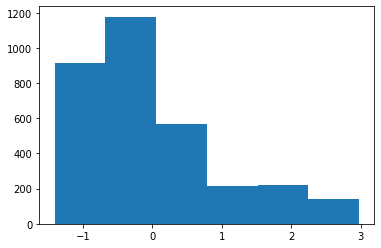

In [ ]:
plt.hist(content_duration,bins = 6)
plt.show()

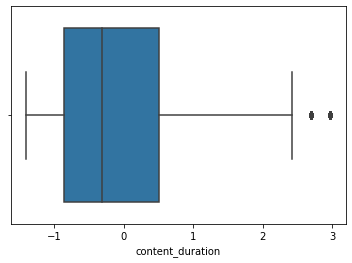

In [ ]:
sns.boxplot(x=scaled_df['content_duration'])

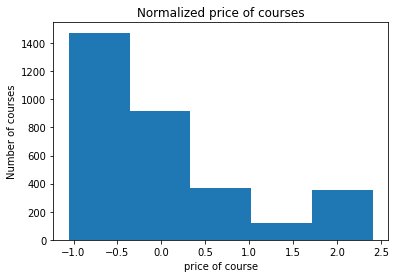

In [ ]:
price = [scaled_df['price']]
plt.hist(price,bins=5)
plt.xlabel("price of course")
plt.ylabel("Number of courses")
plt.title("Normalized price of courses")
plt.show()

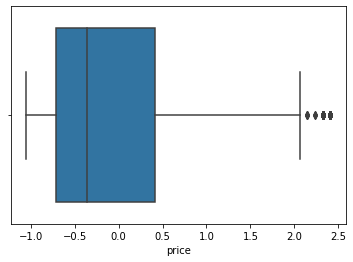

In [ ]:
sns.boxplot(x=scaled_df['price'])

**HYPOTHESIS TESTING**

Research hypothesis, Ha: The average number of subscribers for Web Development courses is greater than 5500.

Null hypothesis, H0: The average number of subscribers for Web Development courses are less than or equal to 5500.

Population : All the courses whose subject is Web Development 

Sample: 25% of the population. Here, 141 courses 

In [ ]:
population_ha = courses_dataframe.loc[courses_dataframe['subject']=="Web Development"]

In [ ]:
population_ha.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
2291,Learn Web Designing & HTML5/CSS3 Essentials in...,True,75.0,43285,525,24,All Levels,4.0,Web Development
2292,ChatBots: Messenger ChatBot with API.AI and No...,True,50.0,2577,529,64,All Levels,4.5,Web Development
2293,Programming Foundations: HTML5 + CSS3 for Entr...,True,20.0,23764,490,58,Beginner Level,5.5,Web Development
2294,How To Make A Wordpress Website 2017 | Divi Th...,True,40.0,3541,202,37,Beginner Level,4.0,Web Development
2295,Build Your Own Backend REST API using Django R...,True,50.0,2669,112,72,Intermediate Level,5.5,Web Development


In [ ]:
sample_ha = population_ha.sample(frac = 0.15)
sample_ha.shape

(141, 9)

In [ ]:
sample_ha['num_subscribers'].describe()

count      141.000000
mean      5708.248227
std       8748.015886
min         34.000000
25%       1134.000000
50%       2532.000000
75%       7196.000000
max      73110.000000
Name: num_subscribers, dtype: float64

Here we see that the sample mean, xbar = 5708.
Here we perform the p-value approach of hypothesis testing. We assume a confidence interval of 95%

In [ ]:
sample_standard_deviation = sample_ha['num_subscribers'].std()
sample_mean = sample_ha['num_subscribers'].mean()
sample_size = 141
alpha = 0.05 

Now we assume that H0 is true. Under this assumption, we generate the null distribution. Under the null distribution, the mean is the border value that seperates the null hypothesis and research hypothesis, in our case the null distribution mean is 5500.

In [ ]:
null_distribution_mean = 5500
null_distribution_standard_deviation = sample_standard_deviation/(sample_size**0.5)

Since the sample size of our sample is greater than 30, we conduct a z test to obtain the probablity of the sample_mean. This value is called the p value. It measures how plausible H0 is 

In [ ]:
z_score = (sample_mean - null_distribution_mean)/null_distribution_standard_deviation
p_value = scipy.stats.norm.sf(abs(z_score))
print(z_score)
print(p_value) 

0.2826710328373362
0.38871451171640103


In [ ]:
if (p_value < alpha):
  print("H0 is rejected and Ha is accepted")
else:
  print("Both H0 and H1 are plausible")

Both H0 and H1 are plausible


Since the p-value of the sample is greater than the significance level we say that both the hypothesis are plausible. In the case of this sample, there is 38.8% probablity that the sample picked could be in disagreemnet with H0

**CORRELATION**

Correlation refers to the act where a certain variables value could be dependent on another variable. Correlation often helps in connecting multiple variables of a dataset.

But it is very important to keep in mind that correlation doesn not imply causation i.e just because two variables have a strong positive or negative correlation, does not imply they are related.

Variables could have a positive correlation when increase in variable A results in increase in variable B. 

Variables could have a negative correlation when decrease in variable A results in increase in variable B.

Variables could have neutral correlation when a change in variable A does not impact the value of variable B.

In [ ]:
courses_dataframe.corr() 

,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
is_paid,1.000000,0.333718,-0.339239,-0.235603,0.127131,0.118534
price,0.333718,1.000000,-0.020402,0.001931,0.211370,0.218440
num_subscribers,-0.339239,-0.020402,1.000000,0.660754,0.040847,0.068656
num_reviews,-0.235603,0.001931,0.660754,1.000000,0.102867,0.122650
num_lectures,0.127131,0.211370,0.040847,0.102867,1.000000,0.661914
content_duration,0.118534,0.218440,0.068656,0.122650,0.661914,1.000000


Here we say that the diagonal is filled with ones owing to the correlation between a column and itself. 

The is_paid column tends to share a negative correlation with num_suscribers probably owing to the fact that users are more likely to access free content over paid. This also likely to be the reason for a negative correlation with num_reviews as well. 

Price has a very tiny amount of correlation with num_subscribers and num_reviews because of the fact that certain courses could be free, their level could also impact the count. 



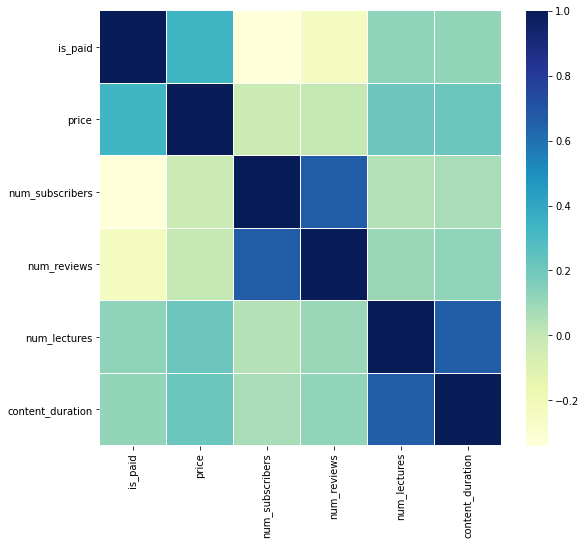

In [ ]:
corrmat = courses_dataframe.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

